### 2021_10_14_3

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [2]:
cancer = load_breast_cancer()
all_X = cancer.data
all_Y = cancer.target

### test_size를 변경해 가면서 모델 생성

In [3]:
def testTreeModel(TestSize=0.3):
    cancer = load_breast_cancer()
    all_X = cancer.data
    all_Y = cancer.target
    X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                        all_Y, 
                                        stratify=cancer.target, 
                                        test_size = TestSize,
                                        random_state=77)
    
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

In [4]:
testTreeModel(0.3)  # 테스트 사이즈 30%
testTreeModel(0.1)  # 테스트 사이즈 10%
testTreeModel(0.2)  # 테스트 사이즈 20%

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.918
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912


### test_size와 max_depth를 변경해 가면서 모델 생성

In [5]:
def testTreeModel(TestSize=0.3, treedepth=3):
    cancer = load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                            all_Y, 
                                            stratify=cancer.target, 
                                            test_size = TestSize,
                                            random_state=77)
    tree = DecisionTreeClassifier(max_depth=treedepth, random_state=0)
    tree.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

In [11]:
for size in range(1, 6, 1) :
  for depth in range(1, 7, 1) :
    print("test_size : {}, depth : {}".format(size / 10, depth))
    testTreeModel(size / 10, depth)  # 테스트 사이즈 30%
  print()

test_size : 0.1, depth : 1
훈련 세트 정확도 : 0.926
테스트 세트 정확도 : 0.860
test_size : 0.1, depth : 2
훈련 세트 정확도 : 0.953
테스트 세트 정확도 : 0.877
test_size : 0.1, depth : 3
훈련 세트 정확도 : 0.971
테스트 세트 정확도 : 0.877
test_size : 0.1, depth : 4
훈련 세트 정확도 : 0.986
테스트 세트 정확도 : 0.877
test_size : 0.1, depth : 5
훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.877
test_size : 0.1, depth : 6
훈련 세트 정확도 : 0.996
테스트 세트 정확도 : 0.895

test_size : 0.2, depth : 1
훈련 세트 정확도 : 0.930
테스트 세트 정확도 : 0.895
test_size : 0.2, depth : 2
훈련 세트 정확도 : 0.956
테스트 세트 정확도 : 0.886
test_size : 0.2, depth : 3
훈련 세트 정확도 : 0.980
테스트 세트 정확도 : 0.895
test_size : 0.2, depth : 4
훈련 세트 정확도 : 0.987
테스트 세트 정확도 : 0.886
test_size : 0.2, depth : 5
훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.912
test_size : 0.2, depth : 6
훈련 세트 정확도 : 0.996
테스트 세트 정확도 : 0.895

test_size : 0.3, depth : 1
훈련 세트 정확도 : 0.932
테스트 세트 정확도 : 0.883
test_size : 0.3, depth : 2
훈련 세트 정확도 : 0.972
테스트 세트 정확도 : 0.912
test_size : 0.3, depth : 3
훈련 세트 정확도 : 0.982
테스트 세트 정확도 : 0.906
test_size : 0.3, depth : 4
훈련 세트 정확도 :

In [12]:
X_train, X_test, y_train, y_test = train_test_split(all_X, all_Y,
                                                    stratify = cancer.target,
                                                    test_size = 40,
                                                    random_state = 77)
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### 트리의 특성 중요도
* 특성 중요도 : 0과 1 사이의 숫자
	* 0은 트리에서 전혀 사용되지 않음.
	* 1은 트리에서 완벽하게 타깃 클래스를 예측했다.
	* 특성 중요도의 전체 합은 1이다.
* 특성의 feature_importance_ 값이 낮다고 해서 특성이 유용하지 않다는 것은 아니다.
* 단지 트리가 그 특성을 선택하지 않았다는 것이다.

In [15]:
model.feature_importances_

array([0.        , 0.02494588, 0.00818101, 0.        , 0.        ,
       0.        , 0.        , 0.01161117, 0.        , 0.        ,
       0.        , 0.        , 0.01428719, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01518308, 0.03510067, 0.74661849, 0.00748376, 0.00748376,
       0.        , 0.        , 0.12910498, 0.        , 0.        ])

In [16]:
cancer.data.shape[1]

30

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

In [21]:
# 한글 및 마이너스 표시 설정
path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Windows":
  font_name = font_manager.FontProperties(fname=path).get_name()
  matplotlib.rc('font', family=font_name)
elif platform.system()=="Darwin":
  rc('font', family='AppleGothic')
else:
  print("Unknown System")

matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

Unknown System


In [22]:
def plot_feature_imp_cancer(model):
  n_features = cancer.data.shape[1]
  imp = model.feature_importances_
  plt.barh(range(n_features) , imp, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("특성 중요도")
  plt.ylabel("특성")
  plt.ylim(-1, n_features)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_

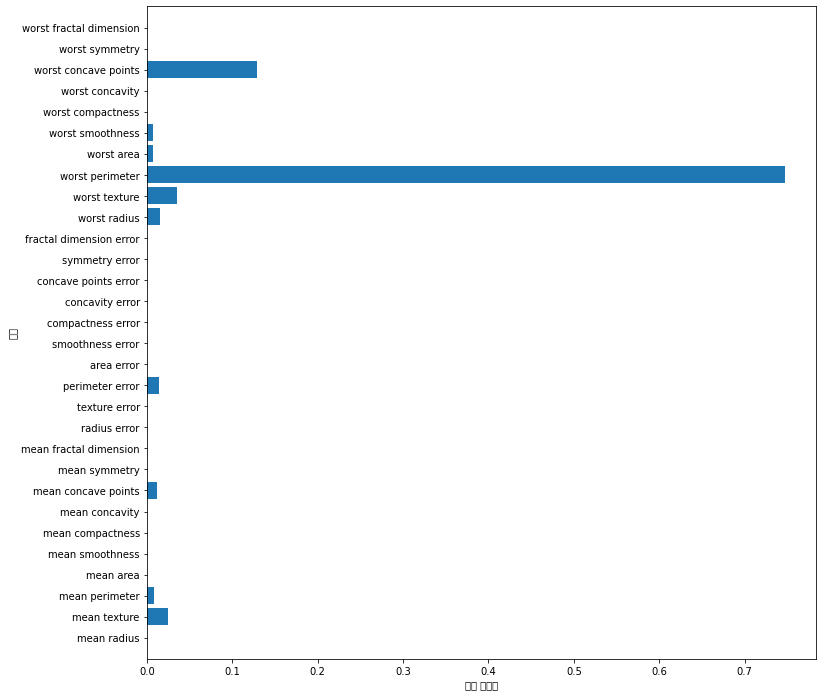

In [23]:
plt.figure(figsize = (12, 12))
plot_feature_imp_cancer(model)